# Tutorial 2: Part 3
Objectives:
- Build a transfer line and compute the TWISS functions from given initial conditions.
- Matching.

**Transfer lines: periodic and initial conditions**

1. Build a tranfer line of 10 m with 4 quadrupoles of L=0.4 m (centered at 2,4,6 and 8 m). With K1 respectively of 0.1, 0.1, 0.1, 0.1 $m^{-2}$. Can you find a periodic solution?

<div>
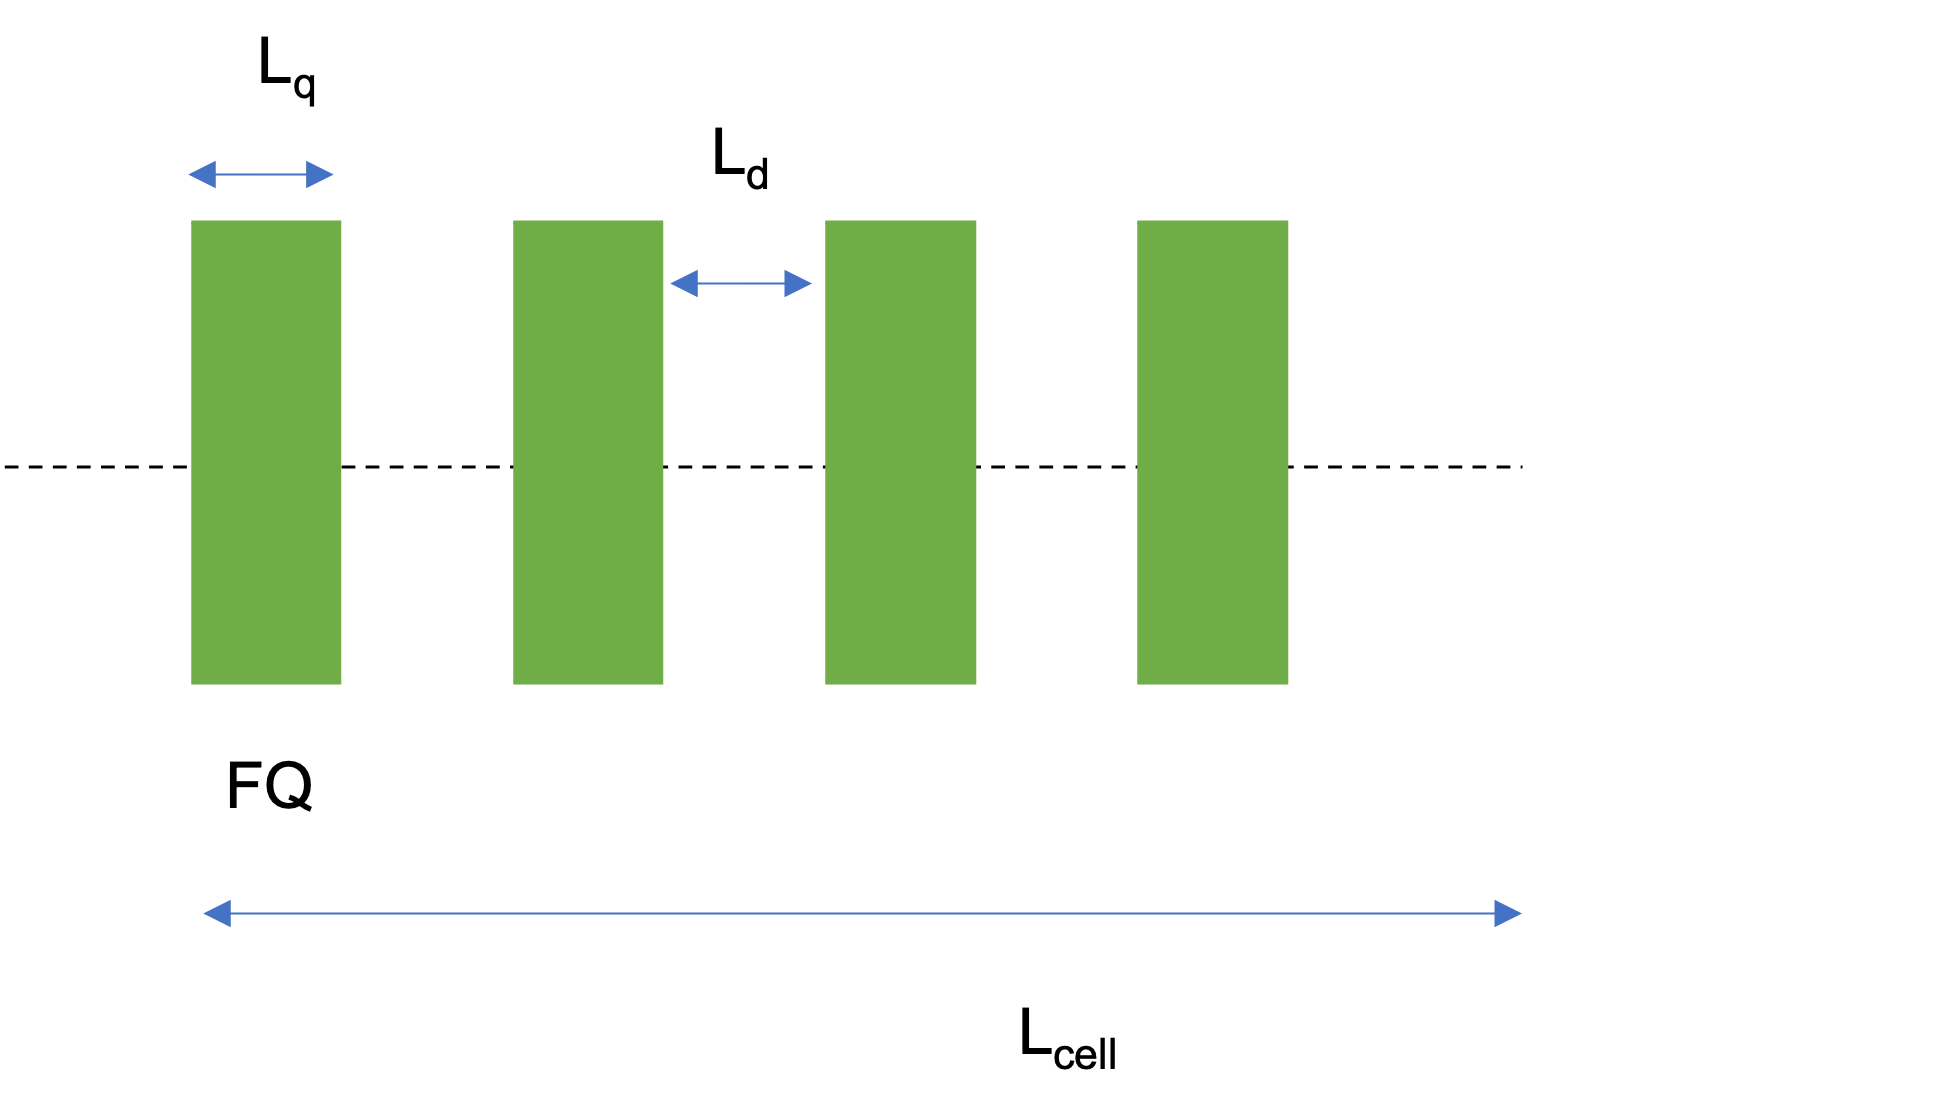
</div>

2. Can you find an initial condition (IC) solution starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0)?


3. What is the final optical conditions ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)

**Tranfer lines: the matching**

4. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) match the line to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)= (2,0,1,0) at the end.


        MATCH, SEQUENCE=myCell, betx=1, bety=2;
        constraint, betx=2, range=#e;
        constraint, alfx=0, range=#e;
        constraint, bety=1, range=#e;
        constraint, alfy=0, range=#e;
        VARY, NAME= myK1, STEP=0.00001;
        VARY, NAME= myK2, STEP=0.00001;
        VARY, NAME= myK3, STEP=0.00001;
        VARY, NAME= myK4, STEP=0.00001;
        JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
        ENDMATCH;

5. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) and the gradient obtained with previous matching, match to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$). Can you find back K1 respectively of 0.1,0.1,0.1,0.1 $m^{-2}$?


6. Consider that the quadrupole have an excitation current factor of 100 A $m^2$ and an excitation magnetic factor of 2 T/m/A amd an aperture of 40 mm diameter. Compute the mgnetic field at the poles of the four quadrupoles after matching. (HINT: assume a linear regime and use a dimensional approach).



In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx
import pandas as pd

In [2]:
myMad = Madx(stdout=True)

1. Build a tranfer line of 10 m with 4 quadrupoles of L=0.4 m (centered at 2,4,6 and 8 m). With K1 respectively of 0.1, 0.1, 0.1 𝑚−2. Can you find a periodic solution? 

In [ ]:
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

!Magnet properties
quadrupoleLenght=??;
cellLength=??;

myK1=??;// m^-2
myK2=??;// m^-2
myK3=??;// m^-2
myK4=??;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

Q: quadrupole, L=quadrupoleLenght;

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=center, L=cellLength;
myStart: marker, at=0;
q1: Q,K1:=??, at=??;
q2: Q,K1:=??, at=??;
q3: Q,K1:=??, at=??;
q4: Q,K1:=??, at=??;
myEnd: marker, at=??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=2;

! *********************************************************************
! Activate the sequence
! *********************************************************************

use, sequence=myCell;

! *********************************************************************
! Twiss
! *********************************************************************

twiss;
'''
myMad.input(myString);

What happens?

2. Can you find a IC solution strting from (𝛽𝑥, 𝛼𝑥, 𝛽𝑦, 𝛼𝑦) = (1 m, 0, 2 m, 0)?. 

    
3. What is the final optical conditions ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)? .

In [110]:
myString='''
twiss,betx=??, bety=??;
'''
myMad.input(myString);

In [ ]:
myDFTable1=myMad.table['twiss'].dframe()
myDFTable1

In [ ]:
# These are the gradients
aux=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux['k1l']/aux['l']

In [ ]:
%matplotlib notebook
aux=myDFTable1
plt.plot(aux['s'],aux['betx'],'o-r', label='$\\beta_x$')
plt.plot(aux['s'],aux['bety'],'s-b', label='$\\beta_y$')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

# First matching

4. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) match the line to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)= (2 m,0,1 m,0) at the end.

In [114]:
myString='''

MATCH, SEQUENCE=myCell, betx=??, bety=??;
constraint, betx=??, range=#e;
constraint, alfx=??, range=#e;
constraint, bety=??, range=#e;
constraint, alfy=??, range=#e;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=??, bety=??, file="./firstpart/AfterMatching1.txt";
'''
myMad.input(myString);


In [ ]:
myDFTable2=myMad.table['twiss'].dframe()
myDFTable2

In [ ]:
aux=myDFTable2[myDFTable2['keyword']=='quadrupole']
aux['k1l']/aux['l']

In [ ]:
%matplotlib notebook
aux=myDFTable2
plt.plot(aux['s'],aux['betx'],'o-r', label='$\\beta_x$')
plt.plot(aux['s'],aux['bety'],'s-b', label='$\\beta_y$')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

# Second matching

5. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) and the gradient obtained with previous matching, match to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$). Can you find back K1 respectively of 0.1,0.1,0.1,0.1 $m^{-2}$?.

In [117]:
myString='''
MATCH, SEQUENCE=myCell, betx=??, bety=??;
constraint, betx=??, range=#e;
constraint, alfx=??->alfx, range=#e;
constraint, bety=??, range=#e;
constraint, alfy=??, range=#e;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
VARY, NAME= ??, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;
twiss,betx=??, bety=??;
'''
myMad.input(myString);

In [ ]:
myDFTable3=myMad.table['twiss'].dframe()
myDFTable3

In [ ]:
# These are the gradients
aux=myDFTable3[myDFTable3['keyword']=='quadrupole']
aux['k1l']/aux['l']

In [ ]:
%matplotlib notebook
aux=myDFTable3
plt.plot(aux['s'],aux['betx'],'b', label='$\\beta_x$ second matching')
plt.plot(aux['s'],aux['bety'],'r', label='$\\beta_y$ second matching')

aux=myDFTable1
plt.plot(aux['s'],aux['betx'],':b', label='$\\beta_x$ w/ initial configuration')
plt.plot(aux['s'],aux['bety'],':r', label='$\\beta_x$ w/ initial configuration')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

What happened? Why?

In [ ]:
# These are the gradients found with the matching
aux=myDFTable3[myDFTable3['keyword']=='quadrupole']
aux['k1l']/aux['l']

In [ ]:
# These are the gradients that can solve our problem
aux=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux['k1l']/aux['l']

# About gradients
6. Consider that the quadrupole have an excitation current factor of 10 A $m^2$ and an excitation magnetic factor of 2 T/m/A amd an aperture of 40 mm diameter. Compute the mgnetic field at the poles of the four quadrupoles after matching. (HINT: assume a linear regime and use a dimensional approach).